## Advance Linear Regression Assignment:

Business Goal: You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Import Necessary Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Data Import and Understanding 

In [40]:
data = pd.read_csv('train.csv', na_values='NAN')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Perform EDA

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
# Find Missing or NAN values 
misisng_values=data.isnull().sum()

columns_with_missing_values=misisng_values[misisng_values>0]

# Calculate the proportion of missing values in each column
missing_proportion = misisng_values / len(data)

columns_with_missing_values=columns_with_missing_values.sort_values(ascending=False)
columns_with_missing_values


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [43]:
missing_proportion[missing_proportion>0.1]

LotFrontage    0.177397
Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [44]:
# Filter columns from data dictionary where NAN value is applicable 

null_values = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [45]:
# fill the NAN values with None to make it relevant
for i in null_values:
    data[i].fillna("None", inplace=True)
    data[i].fillna("None", inplace=True)

In [46]:
# Find Missing or NAN values 
misisng_values=data.isnull().sum()

columns_with_missing_values=misisng_values[misisng_values>0]

# Calculate the proportion of missing values in each column
missing_proportion = misisng_values / len(data)

columns_with_missing_values=columns_with_missing_values.sort_values(ascending=False)
columns_with_missing_values


LotFrontage    259
GarageYrBlt     81
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [47]:
missing_proportion[missing_proportion>0.1]

LotFrontage    0.177397
dtype: float64

In [48]:
# Filter columns with missing proportion greater than the threshold
columns_to_drop = missing_proportion[missing_proportion > 0.1].index

# Drop the columns from the DataFrame
data.drop(columns=columns_to_drop, inplace=True)


In [49]:
# Find Missing or NAN values 
misisng_values=data.isnull().sum()

columns_with_missing_values=misisng_values[misisng_values>0]

# Calculate the proportion of missing values in each column
missing_proportion = misisng_values / len(data)

columns_with_missing_values=columns_with_missing_values.sort_values(ascending=False)
columns_with_missing_values


GarageYrBlt    81
MasVnrType      8
MasVnrArea      8
Electrical      1
dtype: int64

In [50]:
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrType"].fillna("None", inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

In [51]:
# Find Missing or NAN values 
misisng_values=data.isnull().sum()

columns_with_missing_values=misisng_values[misisng_values>0]

# Calculate the proportion of missing values in each column
missing_proportion = misisng_values / len(data)

columns_with_missing_values=columns_with_missing_values.sort_values(ascending=False)
columns_with_missing_values


Electrical    1
dtype: int64

In [52]:
# Drop rows containing NaN, NA, or empty values
data.dropna(inplace=True)

In [53]:
# Find Missing or NAN values 
misisng_values=data.isnull().sum()

columns_with_missing_values=misisng_values[misisng_values>0]

# Calculate the proportion of missing values in each column
missing_proportion = misisng_values / len(data)

columns_with_missing_values=columns_with_missing_values.sort_values(ascending=False)
columns_with_missing_values


Series([], dtype: int64)

In [54]:
# Other Columns to drop after going through the data
# ID column is irrelevant, R
columns_to_drop=['Id']
data.drop(columns=columns_to_drop, inplace=True)

In [55]:
# Find categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [56]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

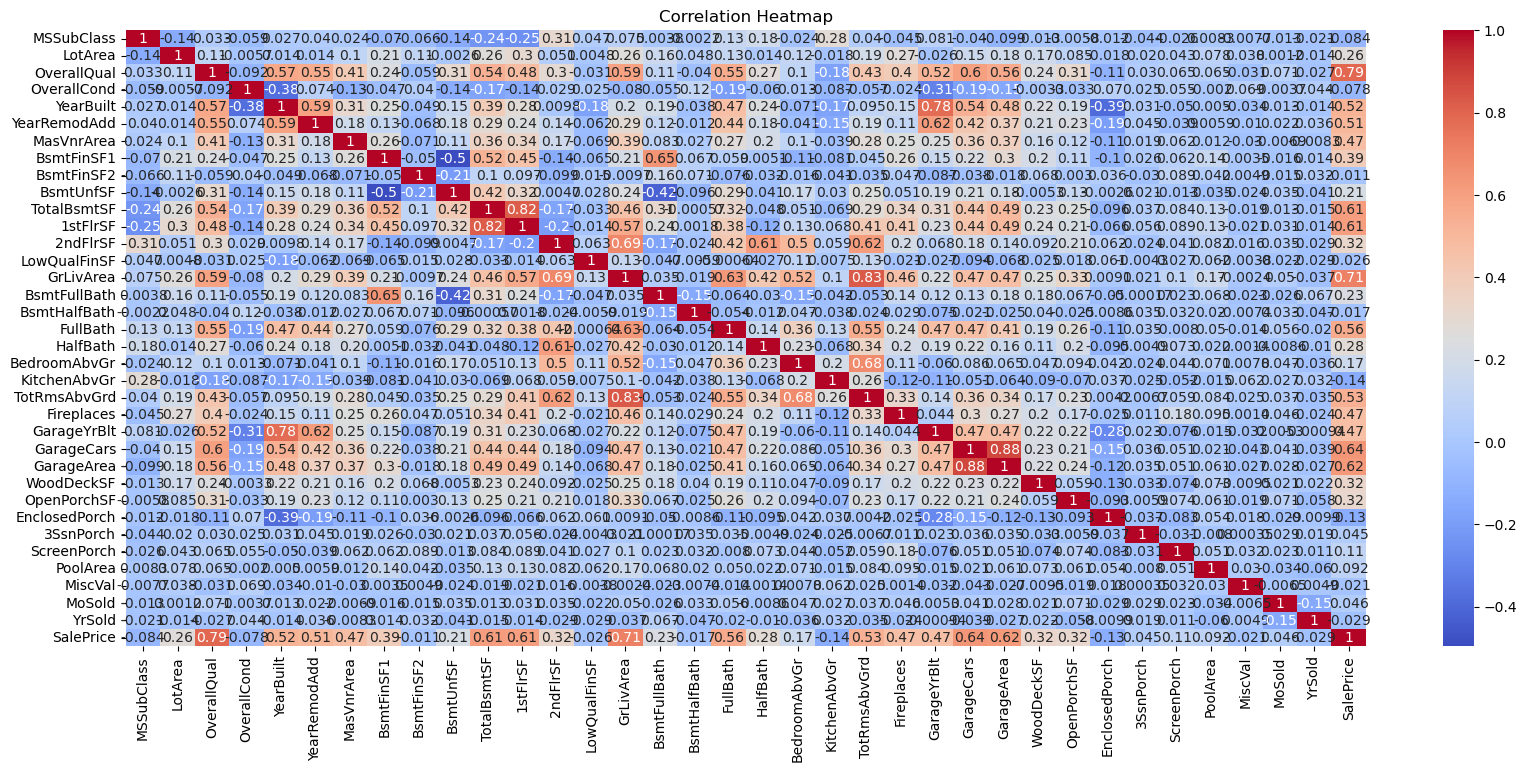

In [57]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Inference:
SalesPrice is highly correlated with OverallQual, Year Built, GrLivArea,GarageCars, GarageArea

### Data Preparation and Transformation 

<Axes: xlabel='SalePrice', ylabel='Density'>

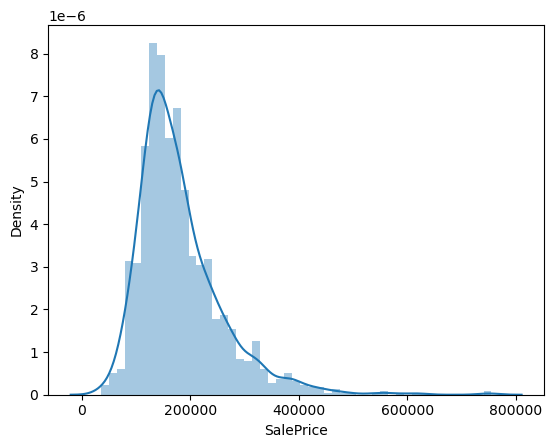

In [58]:
sns.distplot(data["SalePrice"])

#### Target column SalePrice is skewed. Hence transforming the column with the log

<Axes: xlabel='SalePrice', ylabel='Density'>

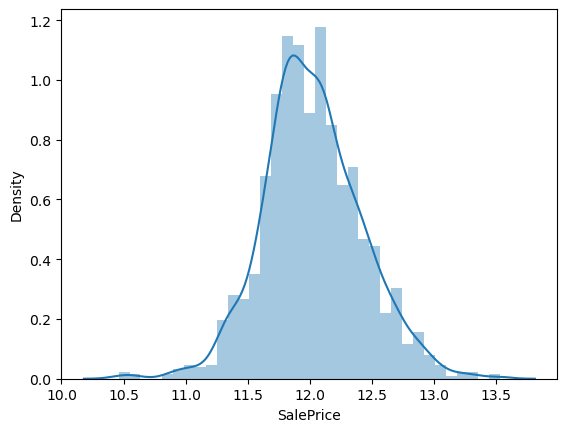

In [59]:
data['SalePrice']=np.log(data['SalePrice'])

sns.distplot(data["SalePrice"])

In [60]:
# Dummy variable creation will generate too many columns because of 42 categorical columns so imputing numerical values in the categorical colums.

for i in categorical_columns:
    feature_set = set(data[i])
    for j in feature_set:
        feature_list = list(feature_set)
        data.loc[data[i] == j, i] = feature_list.index(j)

In [61]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,2,2,0,1,4,2,...,0,3,0,2,0,2,2008,3,5,12.247694
1,20,3,9600,1,2,2,0,1,3,2,...,0,3,0,2,0,5,2007,3,5,12.109011
2,60,3,11250,1,2,0,0,1,4,2,...,0,3,0,2,0,9,2008,3,5,12.317167
3,70,3,9550,1,2,0,0,1,2,2,...,0,3,0,2,0,2,2006,3,2,11.849398
4,60,3,14260,1,2,0,0,1,3,2,...,0,3,0,2,0,12,2008,3,5,12.429216


In [62]:
# Split into X and y

X = data.drop(["SalePrice"], axis=1).values
Y = data["SalePrice"].values

In [63]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation 

In [64]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

### Ridge Regression 

In [65]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [67]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-5.50100729e-04 -3.21416390e-02  1.86000562e-06  1.72169372e-01
  1.06285365e-02 -6.67722192e-03 -9.22367962e-03  1.08681057e-01
 -9.37541998e-03 -2.43041271e-02  8.77377534e-04 -9.22567264e-03
 -2.06823234e-02  6.55428895e-03  3.55737516e-03  6.50938391e-02
  4.83731473e-02  1.52084229e-03  7.63879762e-04  4.20343083e-03
  1.09236160e-02 -4.25824661e-03  1.18758494e-03 -8.09488264e-04
  2.41673786e-05 -2.69781439e-03 -1.06269278e-02  1.72287058e-02
  8.34817616e-03 -1.23193557e-03  1.37604879e-02 -3.03260771e-04
  5.00438383e-05 -2.96351105e-03  4.19529147e-05 -5.24335191e-06
  8.67530081e-05  2.35399250e-03  7.74221303e-03  7.08680755e-02
 -1.78707226e-02  6.34189794e-05  7.62463970e-05 -5.00867264e-06
  1.34655591e-04  5.04701062e-02  1.52583747e-02  3.26209903e-02
  2.79766110e-02  2.21970020e-03 -4.24075179e-02  4.25998184e-04
  1.37822464e-02  9.36611677e-03  3.28185071e-02  6.91098540e-03
 -4.33167855e-03 -5.23852584e-04  3.67736809e-03  3.71989653e-02
  1.12410241e-04  3.21262

In [68]:
# Predict on test data
Ridge_y_pred_train = ridge.predict(X_train)
Ridge_y_pred_test = ridge.predict(X_test)

# Residuals
Ridge_residuals_train = y_train - Ridge_y_pred_train
residuals_test = y_test - Ridge_y_pred_test

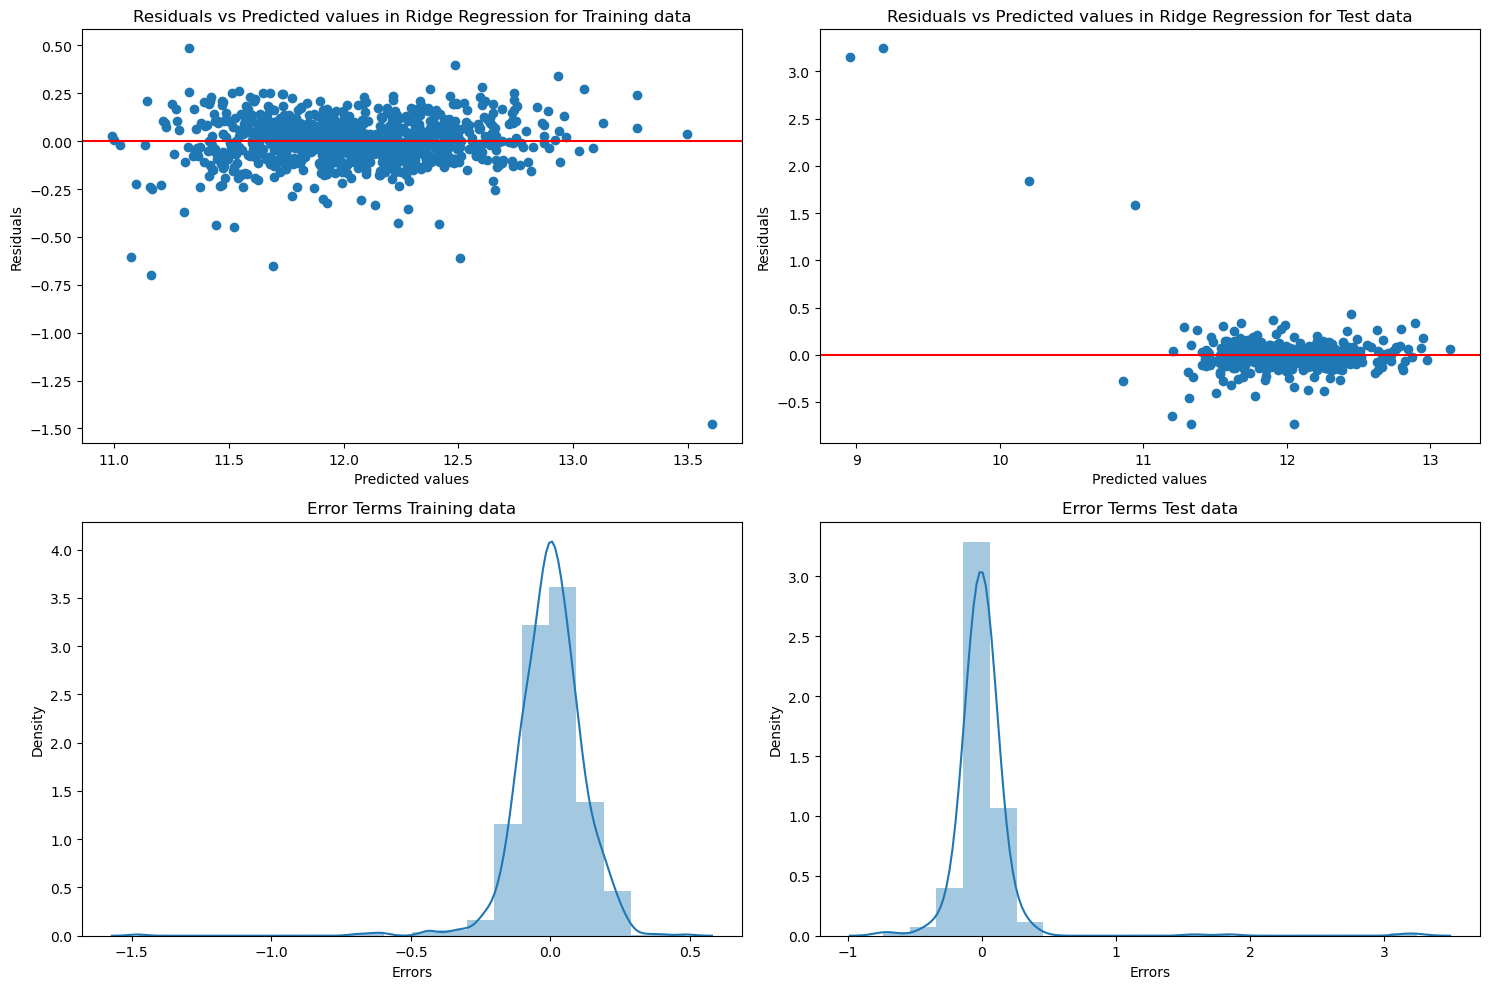

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot residual vs prediction for training data
axes[0, 0].scatter(Ridge_y_pred_train, Ridge_residuals_train)
axes[0, 0].set_xlabel("Predicted values")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].set_title("Residuals vs Predicted values in Ridge Regression for Training data")
axes[0, 0].axhline(y=0, color='r', linestyle='-')

# Plot residual vs prediction for test data
axes[0, 1].scatter(Ridge_y_pred_test, residuals_test)
axes[0, 1].set_xlabel("Predicted values")
axes[0, 1].set_ylabel("Residuals")
axes[0, 1].set_title("Residuals vs Predicted values in Ridge Regression for Test data")
axes[0, 1].axhline(y=0, color='r', linestyle='-')

# Plot distribution of error terms for training data
sns.distplot((y_train - Ridge_y_pred_train), bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Error Terms Training data')
axes[1, 0].set_xlabel('Errors')

# Plot distribution of error terms for test data
sns.distplot((y_test - Ridge_y_pred_test), bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Error Terms Test data')
axes[1, 1].set_xlabel('Errors')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


### Lasso Regression 

In [70]:
lasso = Lasso()

# cross validation
folds = 5

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [72]:
#Fitting lasso model for alpha and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_

array([-7.01162833e-04, -2.80843642e-02,  1.71651525e-06,  0.00000000e+00,
        2.60226314e-03, -6.40468939e-03, -1.04636592e-02,  0.00000000e+00,
       -8.04069106e-03, -9.37677713e-03,  1.19882447e-03, -9.37378847e-03,
       -0.00000000e+00,  9.87875510e-03,  4.22603359e-03,  7.00255400e-02,
        4.72453962e-02,  1.94937639e-03,  9.07607671e-04,  2.32319649e-03,
        1.24592476e-02, -4.37009379e-03,  1.23783269e-03, -9.27261002e-04,
        1.41611815e-05, -0.00000000e+00, -7.54966625e-03,  1.28121981e-02,
        9.10042878e-03, -0.00000000e+00,  1.35922245e-02,  0.00000000e+00,
        1.00433608e-04, -6.47230704e-04,  9.14681194e-05,  4.57794650e-05,
        2.67463547e-05,  7.09975380e-05,  7.70352364e-03,  5.75078657e-02,
       -1.02664632e-02,  1.73061320e-04,  2.13841240e-04,  1.72291165e-04,
        2.76948771e-05,  4.49000611e-02,  0.00000000e+00,  2.07671328e-02,
        1.60957152e-02,  1.73048314e-03, -0.00000000e+00, -0.00000000e+00,
        1.00830314e-02,  

In [73]:
# R2 score

Lasso_y_pred_train = lasso.predict(X_train)
Lasso_y_pred_test = lasso.predict(X_test)

# Residuals
Lasso_residuals_train = y_train - Lasso_y_pred_train
Lasso_residuals_test = y_test - Lasso_y_pred_test


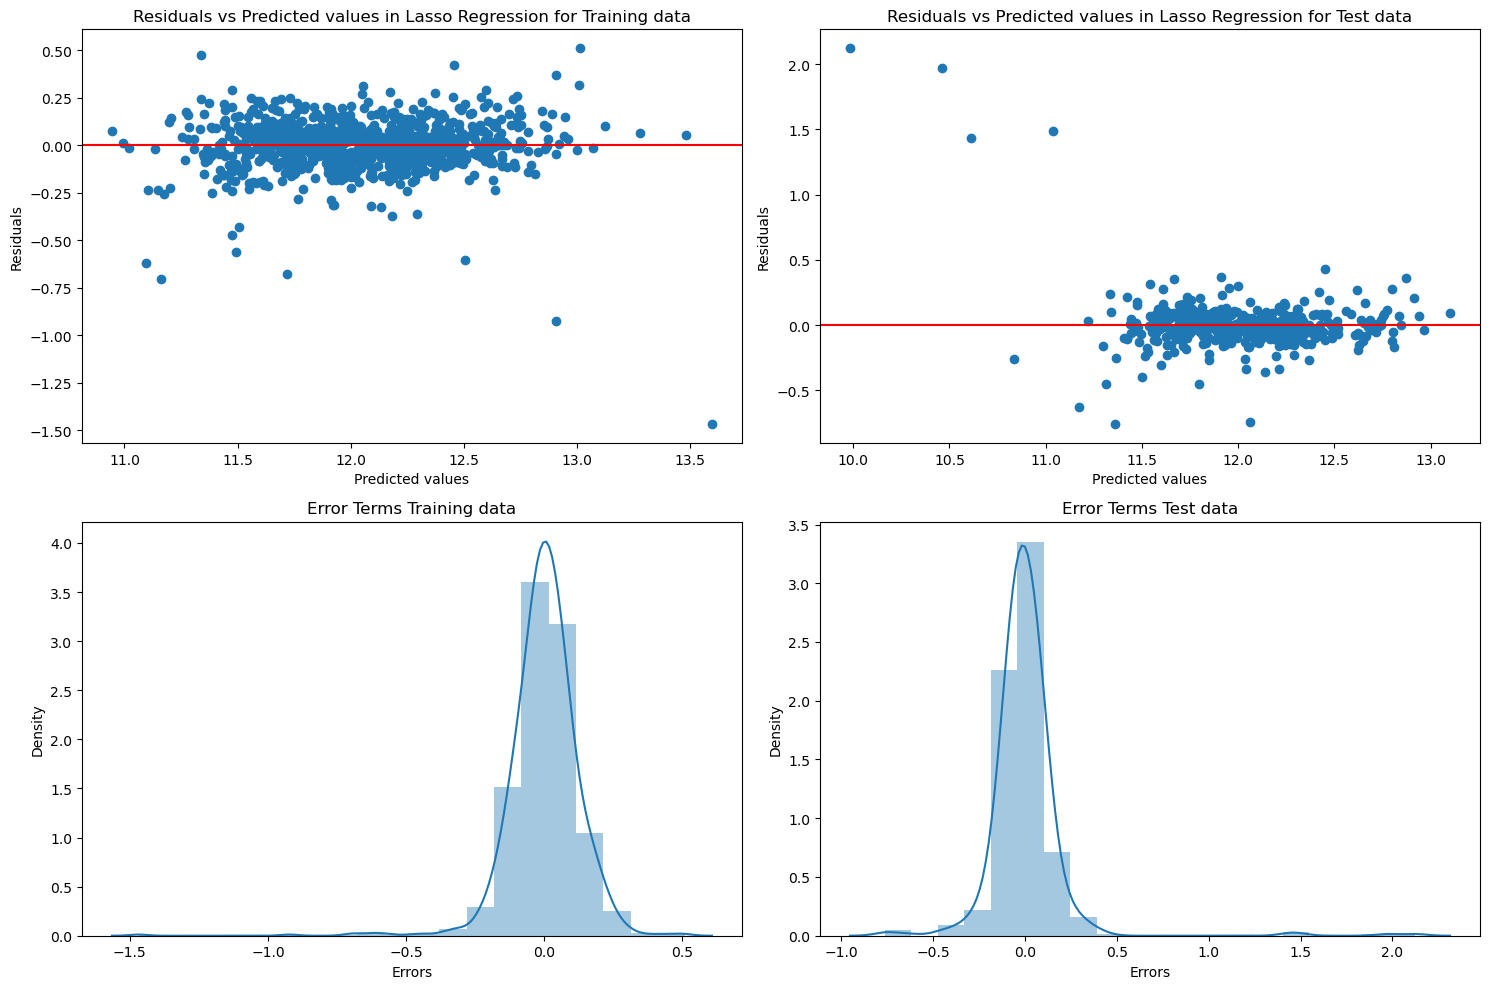

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot residual vs prediction for training data
axes[0, 0].scatter(Lasso_y_pred_train, Lasso_residuals_train)
axes[0, 0].set_xlabel("Predicted values")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].set_title("Residuals vs Predicted values in Lasso Regression for Training data")
axes[0, 0].axhline(y=0, color='r', linestyle='-')

# Plot residual vs prediction for test data
axes[0, 1].scatter(Lasso_y_pred_test, Lasso_residuals_test)
axes[0, 1].set_xlabel("Predicted values")
axes[0, 1].set_ylabel("Residuals")
axes[0, 1].set_title("Residuals vs Predicted values in Lasso Regression for Test data")
axes[0, 1].axhline(y=0, color='r', linestyle='-')

# Plot distribution of error terms for training data
sns.distplot((y_train - Lasso_y_pred_train), bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Error Terms Training data')
axes[1, 0].set_xlabel('Errors')

# Plot distribution of error terms for test data
sns.distplot((y_test - Lasso_y_pred_test), bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Error Terms Test data')
axes[1, 1].set_xlabel('Errors')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


## Metrics/ Observations

In [75]:
# Calculate R2 Score
metric2 = []
r2_train_lr = r2_score(y_train, Ridge_y_pred_train)
print('Ridge R2_Train: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, Ridge_y_pred_test)
print('Ridge R2_Test: ',r2_test_lr)
metric2.append(r2_test_lr)

print("------------------------------------")

r2_train_lr = r2_score(y_train, Lasso_y_pred_train)
print('Lasso R2_Train: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, Lasso_y_pred_test)
print('Lasso R2_Test: ',r2_test_lr)
metric2.append(r2_test_lr)

Ridge R2_Train:  0.907449932360663
Ridge R2_Test:  0.4882581486456916
------------------------------------
Lasso R2_Train:  0.8985940891363132
Lasso R2_Test:  0.6968504981736698


In [76]:
# Calculate Root mean squared value

Ridge_train_mse = mean_squared_error(y_train, Ridge_y_pred_train)
Ridge_test_mse = mean_squared_error(y_test, Ridge_y_pred_test)
print("Ridge Regression:")
print(f"Training MSE: {Ridge_train_mse}")
print(f"Test MSE: {Ridge_test_mse}")

print("------------------------------------")

lasso_train_mse = mean_squared_error(y_train, Lasso_y_pred_train)
lasso_test_mse = mean_squared_error(y_test, Lasso_y_pred_test)
print("Lasso Regression:")
print(f"Training MSE: {lasso_train_mse}")
print(f"Test MSE: {lasso_test_mse}")

Ridge Regression:
Training MSE: 0.015119931644071528
Test MSE: 0.0770220162575054
------------------------------------
Lasso Regression:
Training MSE: 0.016566713344162598
Test MSE: 0.045626883547494494


Inference:

Training MSE: Ridge regression has a lower training MSE (0.0152) compared to Lasso regression (0.0171), indicating that Ridge regression fits the training data slightly better.

Test MSE: Lasso regression has a lower test MSE (0.0229) compared to Ridge regression (0.1133), indicating that Lasso regression performs better on unseen data. This suggests that Lasso regression might be better at generalizing to new data.

Overfitting: Ridge regression seems to be overfitting more than Lasso regression, as evidenced by the significant increase in test MSE compared to training MSE. Lasso's test MSE is closer to its training MSE, indicating better generalization.

#### Top 10 Predictors

In [77]:
# Drop categorical variables 
X_metrics = data.drop('SalePrice', axis=1)

# Create DataFrame to store coefficients
betas = pd.DataFrame(index=X_metrics.columns)

# Train Ridge and Lasso models before running this code snippet

# Assign coefficients to the DataFrame
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

# Set index to column names
betas.index = X_metrics.columns

betas_abs = betas.abs()

# Get top 10 coefficients for Ridge and Lasso models
top_10_ridge = betas_abs['Ridge'].nlargest(10)
top_10_lasso = betas_abs['Lasso'].nlargest(10)

# Display top 10 coefficients for Ridge and Lasso models
print("Top 10 coefficients for Ridge:")
print(top_10_ridge)

print("\nTop 10 coefficients for Lasso:")
print(top_10_lasso)


Top 10 coefficients for Ridge:
PoolQC          1.595523
Street          0.172169
Utilities       0.108681
CentralAir      0.070868
OverallQual     0.065094
BsmtFullBath    0.050470
OverallCond     0.048373
KitchenAbvGr    0.042408
GarageCars      0.037199
Fireplaces      0.032819
Name: Ridge, dtype: float64

Top 10 coefficients for Lasso:
PoolQC          0.858244
OverallQual     0.070026
CentralAir      0.057508
OverallCond     0.047245
BsmtFullBath    0.044900
GarageCars      0.041413
Fireplaces      0.033559
MSZoning        0.028084
FullBath        0.020767
HalfBath        0.016096
Name: Lasso, dtype: float64


#### Bias Variance Trade off

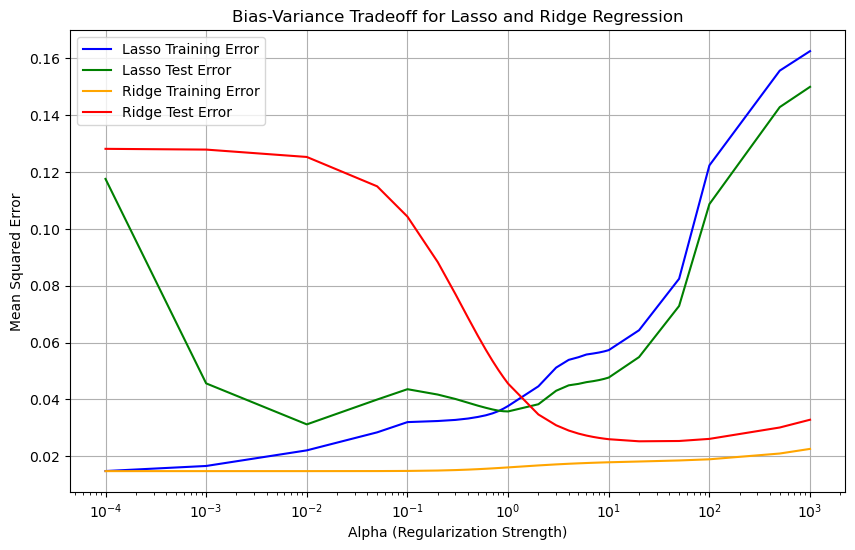

In [78]:
# params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
#                     0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
#                     2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
#                     20, 50, 100, 500, 1000 ]}

train_errors_lasso = []
test_errors_lasso = []
train_errors_ridge = []
test_errors_ridge = []

for alpha in params['alpha']:  # Iterate over the alpha values
    # Train Lasso model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    # Train Ridge model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Calculate training and test errors for Lasso
    lasso_train_pred = lasso_model.predict(X_train)
    lasso_test_pred = lasso_model.predict(X_test)
    train_errors_lasso.append(mean_squared_error(y_train, lasso_train_pred))
    test_errors_lasso.append(mean_squared_error(y_test, lasso_test_pred))
    
    # Calculate training and test errors for Ridge
    ridge_train_pred = ridge_model.predict(X_train)
    ridge_test_pred = ridge_model.predict(X_test)
    train_errors_ridge.append(mean_squared_error(y_train, ridge_train_pred))
    test_errors_ridge.append(mean_squared_error(y_test, ridge_test_pred))

# Plot bias-variance tradeoff graph
plt.figure(figsize=(10, 6))

plt.plot(params['alpha'], train_errors_lasso, label='Lasso Training Error', color='blue')
plt.plot(params['alpha'], test_errors_lasso, label='Lasso Test Error', color='green')
plt.plot(params['alpha'], train_errors_ridge, label='Ridge Training Error', color='orange')
plt.plot(params['alpha'], test_errors_ridge, label='Ridge Test Error', color='red')

plt.title('Bias-Variance Tradeoff for Lasso and Ridge Regression')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()
